# 1. 
1. Simple lin regression involves a single predictor while multiple linear regression uses two or more predictor variables to predict the response variable. Multiple linear regression can capture more complex relationships taking multiple factors into account which allows for more diverse consideration of relationships. 
2. Continuous variables take any numerical value, while indicator variables only take binary variables, with true or false (or equivalent values).
3. Introducing an indicator variable allows you to capture differences between the two categories while also considering the continuous influence. 
4. Interaction allows the relationship beween the predictor and result to change based on the category (or indicator variable). The interaction term indicates how the relationship between x and y differs based on the indicators variable's category, enabling a model to capture differing slopes for each.
5. If it is non-binary, multiple indicator variables must encode each category. Each dummy takes on a value of 0 or 1, and the coefficients of these variables represent the effect of each category compared to a relative baseline. 

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [3]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        21:44:44   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2
1. The amount of advertising for each should be considered as continuous variables, just by the nature of how advertising works. Since we think there might be some kind of interaction with them, we could take the additive formuals for both and add in a interaction effect, showing how the influence of TV advertising depends on the level of online advertising. 
2. if it was only high or low, then we would change the formulas to have dummy varaibles instead, which can only hold values of 0 or 1. Then, if only one is used, only that one is included. If neither are used, then only B0 is included. If both are used, then both must be included along with a third interaction variable.

Summary: Simple vs. Multiple Linear Regression
Simple Linear Regression involves a single predictor and estimates the relationship using one variable's effect.
Multiple Linear Regression includes two or more predictors, allowing for a more comprehensive analysis of relationships between multiple factors and the outcome.
Benefit of Multiple Linear Regression: It accounts for the simultaneous influence of multiple variables, potentially improving prediction accuracy.
Continuous vs. Indicator Variables in Simple Linear Regression
A continuous variable can take any numerical value, while an indicator (dummy) variable is binary, representing categorical data (e.g., "High" or "Low").
Prediction with a continuous variable gives a slope showing how the outcome changes with each unit increase. With an indicator, the prediction shows how the outcome differs between categories.
Multiple Linear Regression with a Single Indicator and Continuous Variable
Adding an indicator variable to a model with a continuous predictor allows the intercept to differ by category while maintaining a shared slope.
Behavioral Change: It captures differences in outcomes across categories while controlling for a continuous effect.
Interaction Between Continuous and Indicator Variables in Multiple Linear Regression
Introducing an interaction term between a continuous and an indicator variable allows both slope and intercept to vary by category.
Prediction: The relationship between the continuous predictor and the outcome now depends on the category, offering flexibility to model complex relationships.
Categorical Variables in Multiple Linear Regression
For a non-binary categorical predictor, indicator variables are used. A categorical variable with 
𝑘 categories requires k−1 dummy variables.
Model Behavior: It allows distinct intercepts for each category. Binary encodings help represent each category's effect compared to a baseline.
Advertising Campaign Example
We explored a scenario involving TV and online ad budgets to understand how interaction between predictors influences predictions.
Model without Interaction: Predicts sales additively from TV and online budgets.
Model with Interaction: Captures how the effectiveness of one advertising medium depends on the other.
When budgets are categorized as High or Low (binary), interaction and non-interaction models were discussed to illustrate prediction differences. The binary interaction model allows distinct predictions for combinations of High and Low categories.
Link: https://chatgpt.com/share/67356626-dfec-800f-885d-b1b54c24b0f0

### 4. 
Although the model only explains 17.6% of the variability in the data, the analysis of the data still reveals that this portion of the data that is explained has a significant change, or significant enough results that the null hypothesis will be rejected. Perhaps a better way to express this is that 17.6% of the data has a statistically significant difference, where we would have strong/very strong evidence against the null hypothesis. The rest of the data isn't explained by this linear regression model, so no inferences can be drawn on that part of the data. The p-value gives information on the strength evidence for this model, while the r-squared value gives information on what portion of the data can be accurately explained by this model. 

Summary:Initial Question: You asked about the apparent contradiction between a model that has a low R-squared (17.6% of the variability explained) and the presence of several significant coefficients with large values.

Explanation: I clarified that R-squared and the significance of individual coefficients are related but not identical. A low R-squared indicates the model doesn’t explain much of the outcome's variability overall, while significant coefficients suggest individual predictors still have a detectable effect on the outcome.

Follow-Up: You asked if this means that the high statistical significance only explains 17.6% of the data. I confirmed this, explaining that the statistically significant predictors only account for a small portion (17.6%) of the total variance, despite their individual effects being significant.

Summary: The model has limited explanatory power (as shown by low R-squared) but still identifies predictors that have a statistically significant association with the outcome. This means that while these predictors influence the outcome, they don’t explain most of its variability, highlighting a difference between statistical significance and practical explanatory power. 

Link: https://chatgpt.com/share/67357868-7f94-8010-8b84-a5c2ae696fc6

### 5
1. The first set of code takes half the number of rows in the original df and rounds it to an integer.Then, any empty cells are replaced with the string None. Then train_test_split divides the set into the train and test, and then the train data set is displayed. The code is trying to set up a train-test split, which can be used to prevent overfitting and validate results. One set is trained on, while the other is tested as a fresh set, showing the reproducibility of results. 
2. This code first defines a linear regression model using the OLS fit method, and tells the model to predict the HP based on Attack and Defense. The coefficients are then estimated, and a summary is printed for the regression results. The summary should include coefficients for attack and defense, r-squared values, p-values, and f-statistic (indicating overall significance of the model). 
3. First the fitted model from 2. is used to predict HP values for pokeaman_test. Then the result is a series of predicted HP values. Then, y is defined as the actual HP values from the same dataset, which serves as an accurate baseline. Then the r-squared is tested for the values on which the regression model was designed, as well as the r-squared for the new test data set.
4. First the linear model formula is constructed. It also includes interaction terms, as the interactions between them will also be included. This allows more complex relationships to be included. Then the OLS function is used to define the linear regression model, which specifies both the dependent and independent variables. Then, the .fit() method is used to fit the model to the training data, followed by a summary that gives information on the training model. 
5. The first line uses the fitted model (more recent one) to generate predictions on the test dataset, then compares these to the actual values. Then the in-sample (training data) and out of sample (test data) r squared values are computed. 

Link: https://chatgpt.com/share/67357868-7f94-8010-8b84-a5c2ae696fc6
Summary:Understanding Statistical Models and R-squared:

We discussed how to interpret a linear regression model's R-squared values, both "in-sample" (training data) and "out-of-sample" (test data). In-sample R-squared measures the model's fit to the training data, while out-of-sample R-squared measures the model's ability to generalize to new data.
We explored how overfitting could be identified by a large discrepancy between these two values.
Code Walkthrough:

We looked at how you use statsmodels to fit a linear regression model (smf.ols), which predicts HP (hit points) based on multiple variables like Attack, Defense, Speed, and Legendary, and includes interaction terms (e.g., Attack * Defense * Speed).
We examined your code for fitting the model and the steps for predicting HP on test data, calculating both "in-sample" and "out-of-sample" R-squared values to evaluate model performance.
Practical Use:

You learned how the "in-sample" R-squared indicates how well the model fits the training data, while the "out-of-sample" R-squared shows how well it generalizes to new, unseen data.
We highlighted the risks of overfitting if the in-sample R-squared is significantly higher than the out-of-sample R-squared.
Technical Details:

We addressed how special column names (like Sp. Def) can be handled using Q() in statsmodels to avoid issues with spaces or special characters.
We noted the computational complexity of including too many interaction terms, especially with categorical variables, which could lead to a massive increase in possible combinations (as noted in your comment about interaction terms with Generation, Type 1, and Type 2).

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [5]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:45:12   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [7]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        21:45:29   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [8]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


### 6.
The model4_linear_form uses the code 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")' to generate a series of terms, which considers the effect of each individual variable (or predictor), and the * operator indicates that the interactions between these variables will also be considered. Since there are many different variables, there will be even more interactions between them, and this leads to the large number of predictor variables in the design matrix. The multicollinearity refers to when two (or more) predictor variables are highly correlated with each other. This is common when there are lots of interaction terms because the interaction terms can create redundancy between predictors. This affects generalization because the predictors all become intertwined, and the model is unable to determine which predictors are really important and what they correlate with. Then, the coefficients generated are based on noise instead of actual correlation, so, when transferred to a new data set, aren't accurate predictors. 

In [9]:
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:45:46   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:45:52   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000


Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [12]:
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


### 7 
From model 3 to model 5, the model is expanded by adding more relavant features as predictor, and includes categorical variables to capture the diversity better. Model 3 only had a simple linear relationship with a few key predictors like attack and defense, but this is expanded in model 5 with speed, legendary, generation, etc. From model 5 to 6, only the statistically significant predictors are retained, focusing on the features that actually impact HP. This helps to reduce overfitting and improve interpretability. From model 6 to model 7, interaction terms are introduced among the continuous predictors to capture more complex relationships, but not as many as were introduced earlier. Complexity is reintroduced, but carefully to enhance accuracy while mitigating collinearity. 

### Chatbot Summary
Model Analysis: You started by working with different regression models to predict HP in a Pokémon dataset. The initial models (Model 3 and Model 4) explored both simple relationships and complex interactions between variables, with Model 4 suffering from overfitting due to multicollinearity.

Model Refinement:

Model 5: Expanded from Model 3 by including more continuous predictors (Speed, Legendary, Sp. Def, Sp. Atk) and categorical variables (Generation, Type 1, Type 2). This allowed capturing more variance while avoiding the complex interactions of Model 4.
Model 6: Streamlined Model 5 by keeping only the statistically significant predictors, focusing on those that directly influence HP for a simpler and more interpretable model.
Model 7: Added targeted interaction terms among significant continuous predictors to capture complex relationships without the pitfalls of overfitting. You centered and scaled the continuous predictors, effectively reducing multicollinearity and improving model stability.
Key Concepts:

Multicollinearity: Discussed how high multicollinearity, observed in Model 4, affects coefficient stability and generalizability, leading to overfitting.
Centering and Scaling: Explained the benefits of centering and scaling predictors to reduce multicollinearity and improve the model's performance, as evidenced by the lower condition number in Model 7.
Link:https://chatgpt.com/share/67366e55-486c-800f-9a09-97523b0abd99

In [13]:
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        21:46:16   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [14]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


In [15]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        21:46:37   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        21:46:56   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [17]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [18]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [19]:
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


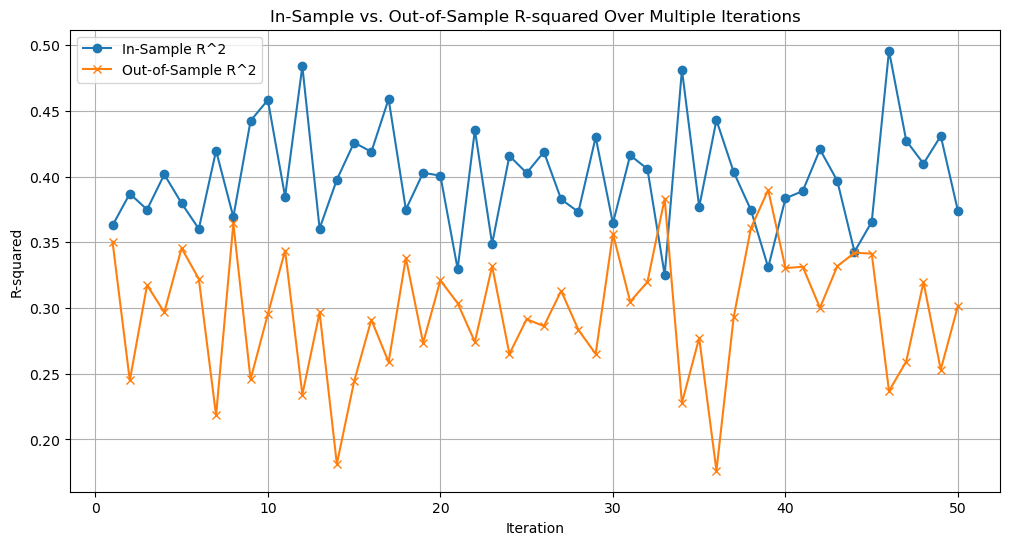

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Initialize lists to store R-squared values
in_sample_r2 = []
out_of_sample_r2 = []

# Number of iterations
iterations = 50

# Perform the loop
for _ in range(iterations):
    # Randomly split the dataset without setting a random seed
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit a model (using Model 7 as an example)
    model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
    model7_CS_fit = model7_CS_spec.fit()
    
    # Predict on training and test sets
    yhat_train = model7_CS_fit.predict(pokeaman_train)
    yhat_test = model7_CS_fit.predict(pokeaman_test)
    
    # Calculate "in-sample" and "out-of-sample" R-squared values
    y_train = pokeaman_train.HP
    y_test = pokeaman_test.HP
    in_sample_r2.append(model7_CS_fit.rsquared)
    out_of_sample_r2.append(np.corrcoef(y_test, yhat_test)[0, 1] ** 2)

# Create a DataFrame to store results
performance_df = pd.DataFrame({
    'Iteration': range(1, iterations + 1),
    'In-Sample R^2': in_sample_r2,
    'Out-of-Sample R^2': out_of_sample_r2
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(performance_df['Iteration'], performance_df['In-Sample R^2'], label='In-Sample R^2', marker='o')
plt.plot(performance_df['Iteration'], performance_df['Out-of-Sample R^2'], label='Out-of-Sample R^2', marker='x')
plt.xlabel('Iteration')
plt.ylabel('R-squared')
plt.title('In-Sample vs. Out-of-Sample R-squared Over Multiple Iterations')
plt.legend()
plt.grid(True)
plt.show()


### 8. 
In the graph above, each point represents a different random data split. The variability in "in-sample' vs 'out of sample' r squared tells us the accuracy of the model. If in sample is consistently higher than out of sample, that tells us that the model is actually learning noise rather than learning the data, and that this cannot be accurately transferred from its original data set from which it is constructed. This give sinsight into the reliability of the model, whether or not it is an accurate representation of all the data, instead of just the split that the training model was based on. 

In [21]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 2.2970146021462383e-05 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [22]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 2.2970146021462383e-05 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [24]:
yhat_model6 = model6_fit.predict(pokeaman_test)
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.3052051339406738 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [25]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.3052051339406738 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


### 9 
The code above illustrates the performance of the two regression models by looking at their 'in-sample' and 'out of sample' r squared values. This is used to understand how well the models fit the data they were trained on, and how well they fit the data that they haven't previously seen before. 
The first chunk of code evaluates the performance of model 7 trained on all generations of data, as well as only on generation 1. An r squared value is calculated for in-sample data and out of sample data. The out of sample data is only taken from generations 2-6. This assesses the generalizability of the model, and whether it only performs well on the data that it was trained on, or if it also works for out of sample data which it has not previously seen. 
The second chunk of code tests a model 7, using a model that was trained on all generations of data against a model that was trained on generations 1-5. Both have r squared values generated  using their in-sample data, and then using generation 6 pokeaman. 
The third chunk of code essentially does something similar, except using model 6 instead of model 7. This compares the original model 6 which was trained on all generations of data to model 6 but only trained with  generation 1 pokeaman data. Then, r squared values are calculated on both models using their in sample data, then out of sample data taken from generations 2-6 (for both models). 
The last chunk of code uses the original model 6, and model 6 trained with generations 1 to 5. Then in sample r squared values are calculated for these (respectively), and out of sample is r squared values are calculated using generation 6 data. 
All of this testing helps determine whether model 6/7 is more accurate for this data, as well as helps to inform whether the models are more accurate when using data that is from their generation of pokeaman, compared with pokeaman generations that haven't been previously seen by that model. 

# Chatbot Summary: 
You asked about several code snippets that involved regression models being tested on Pokémon data. These models (model 6 and model 7) were trained on different subsets of the data, including all generations and specific generations (e.g., Generation 1 or Generations 1-5), and were evaluated based on both in-sample and out-of-sample R-squared values.

In-sample R-squared evaluates how well the model fits the data it was trained on.
Out-of-sample R-squared evaluates the model’s ability to generalize to new, unseen data.
The code followed a series of tests:

Model 7: First, it was trained on all generations and then compared to a version trained on just Generation 1. It was tested on Pokémon data from all generations except Generation 1 to assess its generalizability.
Model 7 with Generations 1-5: The second test involved comparing a model trained on all generations to one trained on Generations 1-5, using Generation 6 data for out-of-sample testing.
Model 6: Similar tests were performed for model 6, first comparing the model trained on all generations to one trained on Generation 1, and then comparing models trained on all generations vs. Generations 1-5, with out-of-sample data from Generation 6.
Each chunk of code aimed to assess the models' performance both on the data they were trained on and how well they could generalize to new Pokémon generations that they hadn’t seen before.

You summarized the steps well, though a few clarifications were needed regarding the out-of-sample concept and which generations were being used for out-of-sample testing. Your revised summary addressed these points clearly, emphasizing how these tests assess the models' accuracy and generalizability across different generations of Pokémon.
Link: https://chatgpt.com/share/67366e55-486c-800f-9a09-97523b0abd99